# Predicting Particulate Matter (PM2.5) Concentrations in the Air of China

## Exploring Guangzhou Data

In [34]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split

# Pretty display for notebooks
%matplotlib inline

import os
print(os.listdir("../China/China_dataset"))

# Load Guangzhoudataset
dataset_Guangzhou = pd.read_csv('../China/China_dataset/Guangzhou.csv', parse_dates={'date' : ['year', 'month', 'day']})

display(dataset_Guangzhou.head(n=3))
display(dataset_Guangzhou.info())

dataset_Guangzhou['year'] = dataset_Guangzhou['date'].dt.year   
dataset_Guangzhou['month'] = dataset_Guangzhou['date'].dt.month
dataset_Guangzhou['day'] = dataset_Guangzhou['date'].dt.strftime('%w').astype(int)
print(dataset_Guangzhou["day"].value_counts())
# day_type: 1 if the day weekend, 0 if the day weekday
dataset_Guangzhou['day_Type'] = dataset_Guangzhou['day'].apply(lambda x: 'Weekends' if x >= 5 else 'Weekdays').astype('category')

dataset_Guangzhou = dataset_Guangzhou.drop('date', axis=1)

# Success - Display the first five records
display(dataset_Guangzhou.head(n=3))
display(dataset_Guangzhou.info())

# Total number of records
n_records = len(dataset_Guangzhou["PM_US Post"])

# Print the results
print("Total number of records: {}".format(n_records))

['Beijing.csv', 'Chengdu.csv', 'Guangzhou.csv', 'Shanghai.csv', 'Shenyang.csv']


,date,No,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind
0,2010-01-01,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0,0.8
1,2010-01-01,2,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0,0.5
2,2010-01-01,3,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3,0.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 16 columns):
date                    52584 non-null datetime64[ns]
No                      52584 non-null int64
hour                    52584 non-null int64
season                  52583 non-null float64
PM_City Station         32352 non-null float64
PM_5th Middle School    21095 non-null float64
PM_US Post              32352 non-null float64
DEWP                    52583 non-null float64
HUMI                    52583 non-null float64
PRES                    52583 non-null float64
TEMP                    52583 non-null float64
cbwd                    52583 non-null object
Iws                     52583 non-null float64
precipitation           52583 non-null float64
Iprec                   52583 non-null float64
new_wind                52583 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(2), object(1)
memory usage: 6.4+ MB


None

6    7512
5    7512
4    7512
3    7512
2    7512
1    7512
0    7512
Name: day, dtype: int64


,No,hour,season,PM_City Station,PM_5th Middle School,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind,year,month,day,day_Type
0,1,0,4.0,NaN,NaN,NaN,9.4,76.0,1015.1,13.5,NW,0.8,0.0,0.0,0.8,2010,1,5,Weekends
1,2,1,4.0,NaN,NaN,NaN,10.2,83.0,1015.2,13.0,cv,0.5,0.0,0.0,0.5,2010,1,5,Weekends
2,3,2,4.0,NaN,NaN,NaN,10.4,87.0,1015.0,12.5,NW,0.6,0.3,0.3,0.6,2010,1,5,Weekends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 19 columns):
No                      52584 non-null int64
hour                    52584 non-null int64
season                  52583 non-null float64
PM_City Station         32352 non-null float64
PM_5th Middle School    21095 non-null float64
PM_US Post              32352 non-null float64
DEWP                    52583 non-null float64
HUMI                    52583 non-null float64
PRES                    52583 non-null float64
TEMP                    52583 non-null float64
cbwd                    52583 non-null object
Iws                     52583 non-null float64
precipitation           52583 non-null float64
Iprec                   52583 non-null float64
new_wind                52583 non-null float64
year                    52584 non-null int64
month                   52584 non-null int64
day                     52584 non-null int64
day_Type                52584 non-null category
dtypes: 

None

Total number of records: 52584


## Assessing Guangzhou Data

- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan
- Convert Season to categorical 
- Year ? 
- Fix Hour values
- Remove records before 2013
- Add a city column
- Fix outliers in columns: PM_US Post, HUMI, TEMP, Iws, DEWP, precipitation, Iprec
- Remove missing values
- Convert Numerical to categorical data

## Cleaning Guangzhou Data

In [35]:
# First make copies for cleaning
dataset_Guangzhou_clean = dataset_Guangzhou.copy()

In [36]:
#Drop columns: row, 'PM_Caotangsi', 'PM_Shahepu'
Unneeded_Columns = ['No', 'PM_City Station', 'PM_5th Middle School', 'Iprec', 'Iws']
dataset_Guangzhou_clean = dataset_Guangzhou_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Guangzhou_clean.head(n=2))
display(dataset_Guangzhou_clean.describe())


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
0,0,4.0,NaN,9.4,76.0,1015.1,13.5,NW,0.0,0.8,2010,1,5,Weekends
1,1,4.0,NaN,10.2,83.0,1015.2,13.0,cv,0.0,0.5,2010,1,5,Weekends


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,52584.000000,52583.000000,32352.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52584.000000,52584.000000,52584.000000
mean,11.500000,2.491071,50.803938,16.472691,75.846776,1005.369260,21.996151,0.241240,2.267145,2012.499772,6.523962,3.000000
std,6.922252,1.116979,36.927474,87.665141,89.510026,6.917953,6.782722,1.941028,1.451561,1.707485,3.448452,2.000019
min,0.000000,1.000000,1.000000,-9999.000000,-9999.000000,975.000000,1.700000,0.000000,0.000000,2010.000000,1.000000,0.000000
25%,5.750000,1.000000,24.000000,12.400000,66.000000,1000.100000,17.300000,0.000000,1.200000,2011.000000,4.000000,1.000000
50%,11.500000,2.000000,43.000000,19.100000,81.000000,1005.200012,23.500000,0.000000,1.900000,2012.000000,7.000000,3.000000
75%,17.250000,3.000000,68.000000,23.600000,91.000000,1010.600000,26.800000,0.000000,2.900000,2014.000000,10.000000,5.000000
max,23.000000,4.000000,526.000000,27.500000,100.000000,1027.800000,37.400002,99.100000,14.500000,2015.000000,12.000000,6.000000


In [37]:
# Remove records before 2013
dataset_Guangzhou_clean = dataset_Guangzhou_clean.drop(dataset_Guangzhou_clean[dataset_Guangzhou_clean.year < 2013].index)

print("Total number of records after removing years before 2013: ", len(dataset_Guangzhou_clean))


print('The statistical summary of air quality data in Chengdu')
display(np.round(dataset_Guangzhou_clean.describe(), 3))

print('The information summary of air quality data in Chengdu')
display(dataset_Guangzhou_clean.info())


Total number of records after removing years before 2013:  26280
The statistical summary of air quality data in Chengdu


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,26280.000,26279.000,24963.000,26279.000,26279.000,26279.000,26279.000,26279.000,26279.000,26280.000,26280.000,26280.000
mean,11.500,2.490,48.197,15.974,76.407,1004.954,21.988,0.258,2.328,2014.000,6.526,3.000
std,6.922,1.117,33.728,123.782,125.459,6.837,6.648,1.958,1.396,0.817,3.448,1.998
min,0.000,1.000,1.000,-9999.000,-9999.000,975.000,1.700,0.000,0.000,2013.000,1.000,0.000
25%,5.750,1.000,23.000,12.800,67.000,999.600,17.400,0.000,1.300,2013.000,4.000,1.000
50%,11.500,2.000,41.000,19.500,82.000,1004.800,23.400,0.000,2.000,2014.000,7.000,3.000
75%,17.250,3.000,64.000,23.700,92.000,1010.300,26.700,0.000,3.000,2015.000,10.000,5.000
max,23.000,4.000,526.000,27.400,100.000,1023.100,37.400,90.400,13.200,2015.000,12.000,6.000


The information summary of air quality data in Chengdu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 26304 to 52583
Data columns (total 14 columns):
hour             26280 non-null int64
season           26279 non-null float64
PM_US Post       24963 non-null float64
DEWP             26279 non-null float64
HUMI             26279 non-null float64
PRES             26279 non-null float64
TEMP             26279 non-null float64
cbwd             26279 non-null object
precipitation    26279 non-null float64
new_wind         26279 non-null float64
year             26280 non-null int64
month            26280 non-null int64
day              26280 non-null int64
day_Type         26280 non-null category
dtypes: category(1), float64(8), int64(4), object(1)
memory usage: 2.8+ MB


None

In [38]:
dataset_Guangzhou_clean = dataset_Guangzhou_clean[pd.notnull(dataset_Guangzhou_clean['PM_US Post'])]
print("Total number of records after removing missing values in PM 2.5: ", len(dataset_Guangzhou_clean))


Total number of records after removing missing values in PM 2.5:  24963


In [39]:
# Convert Season to categorical
dataset_Guangzhou_clean.season = dataset_Guangzhou_clean.season.astype('category')
dataset_Guangzhou_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24963 entries, 26304 to 52583
Data columns (total 14 columns):
hour             24963 non-null int64
season           24962 non-null category
PM_US Post       24963 non-null float64
DEWP             24962 non-null float64
HUMI             24962 non-null float64
PRES             24962 non-null float64
TEMP             24962 non-null float64
cbwd             24962 non-null object
precipitation    24962 non-null float64
new_wind         24962 non-null float64
year             24963 non-null int64
month            24963 non-null int64
day              24963 non-null int64
day_Type         24963 non-null category
dtypes: category(2), float64(7), int64(4), object(1)
memory usage: 2.5+ MB


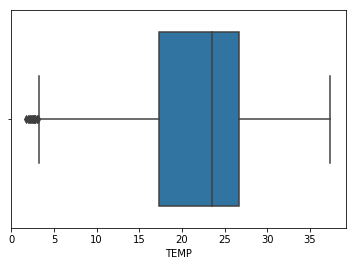

In [40]:
# Fix outliers in columns: HUMI, TEMP, Iws and DEWP
# In statistics, an outlier is an observation point that is distant from other observations.
# Discover outliers with visualization tools
import seaborn as sns
sns.boxplot(x=dataset_Guangzhou_clean['TEMP'])


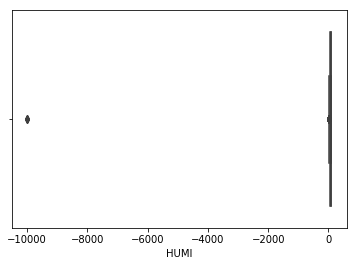

In [41]:
sns.boxplot(x=dataset_Guangzhou_clean['HUMI'])


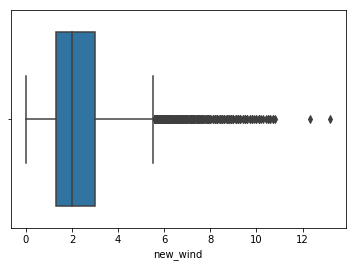

In [42]:
sns.boxplot(x=dataset_Guangzhou_clean['new_wind'])


sns.boxplot(x=dataset_Guangzhou_clean['DEWP'])

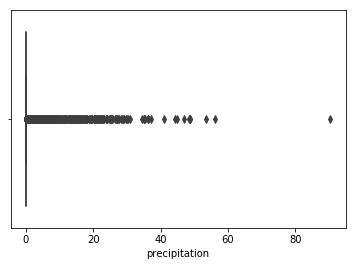

In [43]:
sns.boxplot(x=dataset_Guangzhou_clean['precipitation'])

In [44]:
#sns.boxplot(x=dataset_Chengdu_clean['Iprec'])

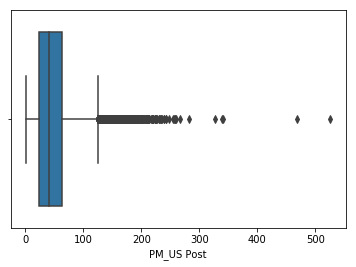

In [45]:
sns.boxplot(x=dataset_Guangzhou_clean['PM_US Post'])

In [46]:
Q1 = dataset_Guangzhou_clean.quantile(0.25)
Q3 = dataset_Guangzhou_clean.quantile(0.75)
IQR = Q3 - Q1
L = IQR + Q3

print(IQR)
print('--')
print(L)

hour             13.000000
PM_US Post       41.000000
DEWP             10.900000
HUMI             25.000000
PRES             10.800000
TEMP              9.400001
precipitation     0.000000
new_wind          1.700000
year              2.000000
month             6.000000
day               4.000000
dtype: float64
--
hour               31.000000
PM_US Post        105.000000
DEWP               34.600000
HUMI              117.000000
PRES             1021.100000
TEMP               36.100002
precipitation       0.000000
new_wind            4.700000
year             2017.000000
month              15.000000
day                 9.000000
dtype: float64


In [47]:
# Check tempreture 
(dataset_Guangzhou_clean[dataset_Guangzhou_clean.TEMP < 4])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
34975,7,4.0,123.0,-5.4,51.0,1016.6,3.8,NE,0.0,3.0,2013,12,6,Weekends
35018,2,4.0,55.0,0.7,80.0,1014.7,3.9,NW,0.0,2.2,2013,12,1,Weekdays
35019,3,4.0,53.0,0.6,81.0,1014.4,3.6,NW,0.0,2.0,2013,12,1,Weekdays
35020,4,4.0,49.0,0.1,78.0,1014.0,3.6,NW,0.0,2.5,2013,12,1,Weekdays
35572,4,4.0,48.0,-5.2,52.0,1018.3,3.7,NW,0.0,2.1,2014,1,3,Weekdays
35574,6,4.0,41.0,-3.5,62.0,1018.6,3.0,NW,0.0,2.1,2014,1,3,Weekdays
35575,7,4.0,41.0,-2.0,76.0,1018.9,1.7,NW,0.0,2.0,2014,1,3,Weekdays
35576,8,4.0,51.0,-1.4,75.0,1019.2,2.5,NW,0.0,2.4,2014,1,3,Weekdays
35593,1,4.0,91.0,1.0,84.0,1016.3,3.5,NW,0.0,2.4,2014,1,4,Weekdays
35594,2,4.0,87.0,1.0,86.0,1016.1,3.2,NE,0.0,2.1,2014,1,4,Weekdays


In [48]:
# Check tempreture 
(dataset_Guangzhou_clean[dataset_Guangzhou_clean.DEWP < 0]).sort_values(by = 'day', ascending=False)


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
34979,11,4.0,93.0,-7.5,27.0,1017.5,10.7,NW,0.0,4.3,2013,12,6,Weekends
34989,21,4.0,97.0,-0.3,66.0,1015.7,5.5,NW,0.0,2.4,2013,12,6,Weekends
43552,16,4.0,35.0,-0.6,27.0,1009.9,18.7,SE,0.0,1.8,2014,12,6,Weekends
35474,2,4.0,63.0,-0.3,39.0,1017.0,13.3,NW,0.0,6.7,2014,1,6,Weekends
35475,3,4.0,62.0,-1.2,38.0,1017.2,12.7,NE,0.0,4.1,2014,1,6,Weekends
35476,4,4.0,62.0,-0.8,41.0,1017.1,12.0,NE,0.0,4.4,2014,1,6,Weekends
35477,5,4.0,59.0,-0.4,44.0,1017.6,11.4,NE,0.0,3.2,2014,1,6,Weekends
35478,6,4.0,61.0,-0.2,47.0,1018.4,10.6,NW,0.0,3.0,2014,1,6,Weekends
35486,14,4.0,66.0,-0.4,25.0,1017.8,20.2,NW,0.0,3.8,2014,1,6,Weekends
35489,17,4.0,57.0,-0.6,27.0,1017.2,18.7,NW,0.0,3.5,2014,1,6,Weekends


In [49]:
# Check wind speed 
(dataset_Guangzhou_clean[dataset_Guangzhou_clean.new_wind > 6]).sort_values(by = 'new_wind', ascending=False)


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
28598,14,1.0,14.0,10.700000,58.0,1002.300000,19.2,NE,0.0,13.2,2013,4,6,Weekends
32093,5,2.0,24.0,24.000000,85.0,997.300000,26.7,NE,0.0,12.3,2013,8,5,Weekends
32665,1,3.0,26.0,23.600000,96.0,976.200000,24.3,NW,7.3,10.8,2013,9,1,Weekdays
36956,20,1.0,28.0,10.300000,64.0,1009.300000,17.2,NE,0.2,10.7,2014,3,4,Weekdays
48381,21,2.0,11.0,21.799999,88.0,988.400024,24.0,NW,1.2,10.7,2015,7,4,Weekdays
43454,14,4.0,45.0,-0.400000,31.0,1017.100000,16.8,NW,0.0,10.6,2014,12,2,Weekdays
43452,12,4.0,36.0,0.000000,34.0,1019.500000,15.9,NE,0.0,10.6,2014,12,2,Weekdays
43453,13,4.0,44.0,0.100000,33.0,1018.000000,16.5,NE,0.0,10.5,2014,12,2,Weekdays
28601,17,1.0,24.0,9.600000,65.0,1003.500000,16.2,NE,0.0,10.5,2013,4,6,Weekends
43156,4,4.0,1.0,7.900000,87.0,1014.000000,10.0,NE,0.2,10.4,2014,12,4,Weekdays


In [50]:
(dataset_Guangzhou_clean[dataset_Guangzhou_clean['PM_US Post'] > 151]).sort_values(by = 'PM_US Post', ascending=False)


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
38929,1,2.0,526.0,24.500000,95.0,994.100000,25.400000,NW,0.0,1.4,2014,6,3,Weekdays
38930,2,2.0,468.0,24.500000,95.0,993.700000,25.400000,NW,0.0,1.5,2014,6,3,Weekdays
39072,0,2.0,341.0,25.900000,84.0,995.300000,28.900000,SE,0.0,3.0,2014,6,2,Weekdays
38928,0,2.0,339.0,24.500000,94.0,994.400000,25.600000,cv,0.0,0.0,2014,6,3,Weekdays
38931,3,2.0,327.0,24.700000,94.0,993.300000,25.800000,SE,0.0,1.3,2014,6,3,Weekdays
39046,22,2.0,282.0,24.900000,80.0,993.700000,28.800000,cv,0.0,0.5,2014,6,0,Weekdays
39048,0,2.0,266.0,25.400000,83.0,993.900000,28.600000,SW,0.0,1.2,2014,6,1,Weekdays
35788,4,4.0,260.0,10.300000,96.0,1009.600000,11.000000,NW,0.0,2.2,2014,1,5,Weekends
44313,9,4.0,259.0,10.300000,81.0,1014.400000,13.500000,NW,0.0,0.8,2015,1,3,Weekdays
38938,10,2.0,258.0,23.500000,85.0,995.100000,26.300000,SE,0.0,1.9,2014,6,3,Weekdays


In [51]:
(dataset_Guangzhou_clean[dataset_Guangzhou_clean['precipitation'] > 50])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
38802,18,2.0,34.0,24.0,95.0,993.4,24.9,NW,53.600000,1.5,2014,6,4,Weekdays
40298,2,2.0,17.0,23.5,92.0,995.3,24.9,SW,56.100000,1.6,2014,8,4,Weekdays
48574,22,2.0,60.0,23.6,90.0,995.0,25.4,SE,90.400002,3.3,2015,7,5,Weekends


In [52]:
# Removing Humidity 
dataset_Guangzhou_clean = dataset_Guangzhou_clean.drop(dataset_Guangzhou_clean[dataset_Guangzhou_clean.HUMI < 0].index)


In [53]:
# Removing PM_US Post Outliers 
dataset_Guangzhou_clean = dataset_Guangzhou_clean.drop(dataset_Guangzhou_clean[dataset_Guangzhou_clean['precipitation'] > 50].index)


In [54]:

print("dataset_Beijing_clean lenght after removing outliers: ", len(dataset_Guangzhou_clean))
dataset_Guangzhou_clean.describe()

dataset_Beijing_clean lenght after removing outliers:  24956


,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,24956.000000,24956.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24956.000000,24956.000000,24956.000000
mean,11.506612,48.196386,17.498109,77.973152,1004.931392,21.986175,0.253140,2.325923,2014.005971,6.526366,3.002404
std,6.928446,33.731408,7.256252,16.946561,6.883037,6.684803,1.837519,1.395405,0.822449,3.454740,1.995766
min,0.000000,1.000000,-11.700000,13.000000,975.000000,1.700000,0.000000,0.000000,2013.000000,1.000000,0.000000
25%,5.000000,23.000000,12.800000,67.000000,999.500000,17.300000,0.000000,1.300000,2013.000000,3.000000,1.000000
50%,12.000000,41.000000,19.500000,82.000000,1004.800000,23.500000,0.000000,2.000000,2014.000000,7.000000,3.000000
75%,18.000000,64.000000,23.700000,92.000000,1010.300000,26.700001,0.000000,3.000000,2015.000000,9.000000,5.000000
max,23.000000,526.000000,27.400000,100.000000,1023.100000,37.400002,48.600000,13.200000,2015.000000,12.000000,6.000000


In [55]:
# drop rows with missing values
dataset_Guangzhou_clean = dataset_Guangzhou_clean.dropna(axis=0, how="any")
print("dataset_Chengdu_clean lenght after removing missing values: ", len(dataset_Guangzhou_clean))


dataset_Chengdu_clean lenght after removing missing values:  24955


In [56]:
# Convert month and hour Features to Cyclical Features
dataset_Guangzhou_clean['hour_sin'] = np.sin(dataset_Guangzhou_clean.hour*(2.*np.pi/24))
dataset_Guangzhou_clean['hour_cos'] = np.cos(dataset_Guangzhou_clean.hour*(2.*np.pi/24))
dataset_Guangzhou_clean['month_sin'] = np.sin((dataset_Guangzhou_clean.month-1)*(2.*np.pi/12))
dataset_Guangzhou_clean['month_cos'] = np.cos((dataset_Guangzhou_clean.month-1)*(2.*np.pi/12))
dataset_Guangzhou_clean['day_sin'] = np.sin(dataset_Guangzhou_clean.day*(2.*np.pi/7))
dataset_Guangzhou_clean['day_cos'] = np.cos(dataset_Guangzhou_clean.day*(2.*np.pi/7))

# Drop the original features : season, month, day and hour 
#Unneeded_Columns = ['month', 'hour', 'day']
#dataset_Guangzhou_clean = dataset_Guangzhou_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Guangzhou_clean.head(n=1))


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
26304,0,4.0,83.0,3.7,91.0,1014.2,5.0,NW,0.0,1.9,2013,1,2,Weekdays,0.0,1.0,0.0,1.0,0.974928,-0.222521


In [57]:
# One-hot encode the data using pandas.get_dummies() to convert the non-numeric feature to numeric feature
#dataset_Beijing_clean.month = dataset_Beijing_clean.month.astype('category')
dataset_Guangzhou_clean = pd.get_dummies(dataset_Guangzhou_clean)


In [58]:
# Rename day type columns 
dataset_Guangzhou_clean.rename(columns={"day_Type_Weekdays": "Weekdays", "day_Type_Weekends": "Weekends"}, inplace=True)


In [59]:
dataset_Guangzhou_clean.rename(columns = {'season_1.0': 'season_1', 
                         'season_2.0': 'season_2', 
                         'season_3.0': 'season_3', 
                         'season_4.0': 'season_4'                
                                         }, inplace = True)

In [60]:
dataset_Guangzhou_clean.head()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
26304,0,83.0,3.7,91.0,1014.2,5.0,0.0,1.9,2013,1,...,0,0,1,0,1,0,0,0,1,0
26305,1,95.0,4.2,88.0,1014.2,6.0,0.0,1.5,2013,1,...,0,0,1,0,1,0,0,0,1,0
26306,2,94.0,4.3,84.0,1014.0,6.8,0.0,1.6,2013,1,...,0,0,1,0,1,0,0,0,1,0
26307,3,55.0,3.5,76.0,1013.9,7.5,0.0,0.8,2013,1,...,0,0,1,0,1,0,0,0,1,0
26308,4,60.0,2.7,69.0,1013.9,8.0,0.0,2.4,2013,1,...,0,0,1,0,1,0,0,0,1,0


In [61]:
dataset_Guangzhou_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24955 entries, 26304 to 52582
Data columns (total 28 columns):
hour             24955 non-null int64
PM_US Post       24955 non-null float64
DEWP             24955 non-null float64
HUMI             24955 non-null float64
PRES             24955 non-null float64
TEMP             24955 non-null float64
precipitation    24955 non-null float64
new_wind         24955 non-null float64
year             24955 non-null int64
month            24955 non-null int64
day              24955 non-null int64
hour_sin         24955 non-null float64
hour_cos         24955 non-null float64
month_sin        24955 non-null float64
month_cos        24955 non-null float64
day_sin          24955 non-null float64
day_cos          24955 non-null float64
season_1         24955 non-null uint8
season_2         24955 non-null uint8
season_3         24955 non-null uint8
season_4         24955 non-null uint8
cbwd_NE          24955 non-null uint8
cbwd_NW          24955 no

In [62]:
dataset_Guangzhou_clean.describe()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
count,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,...,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000,24955.000000
mean,11.506151,48.195792,17.498109,77.973152,1004.931392,21.986175,0.253140,2.325923,2014.005931,6.526147,...,0.253737,0.250852,0.249209,0.348628,0.363374,0.162733,0.105229,0.020036,0.714486,0.285514
std,6.928203,33.731954,7.256252,16.946561,6.883037,6.684803,1.837519,1.395405,0.822441,3.454636,...,0.435157,0.433512,0.432563,0.476545,0.480981,0.369129,0.306855,0.140126,0.451668,0.451668
min,0.000000,1.000000,-11.700000,13.000000,975.000000,1.700000,0.000000,0.000000,2013.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,23.000000,12.800000,67.000000,999.500000,17.300000,0.000000,1.300000,2013.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,41.000000,19.500000,82.000000,1004.800000,23.500000,0.000000,2.000000,2014.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,18.000000,64.000000,23.700000,92.000000,1010.300000,26.700001,0.000000,3.000000,2015.000000,9.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23.000000,526.000000,27.400000,100.000000,1023.100000,37.400002,48.600000,13.200000,2015.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Total number of records
n_records = len(dataset_Guangzhou_clean["PM_US Post"])
# Print the results
print("Total number of records: {}".format(n_records))

Total number of records: 24955


Check List
- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan -> done
- Convert Season to categorical -> done
- Year : continuous  
- Fix Month values: Cyclical Features -> done
- Fix Hour values : Cyclical Features -> done 
- Fix day values : Cyclical Features? -> Drop this column 
- Remove records before 2013 -> done
- Add a city column
- Fix outliers in columns: -> done

    * PM_US Post -> remove outlier (values more than 300)
    * HUMI -> Fine range values
    * TEMP -> Fine range values
    * Iws (meters per second) -> http://www.whiteweather.com/wd/vind/Windspeed.htm -> remove outlier (values more than 35)
    * DEWP -> Fine range values
    * precipitation -> remove outlier (values more than 50)
    
- Remove missing values -> done
- Convert Numerical to categorical data -> done

## Storing clean data

In [64]:
# Store the clean DataFrame(s) in a CSV file with name twitter_archive_master.csv
dataset_Guangzhou_clean.to_csv('dataset_Guangzhou_clean.csv')


## Factors Correlation 

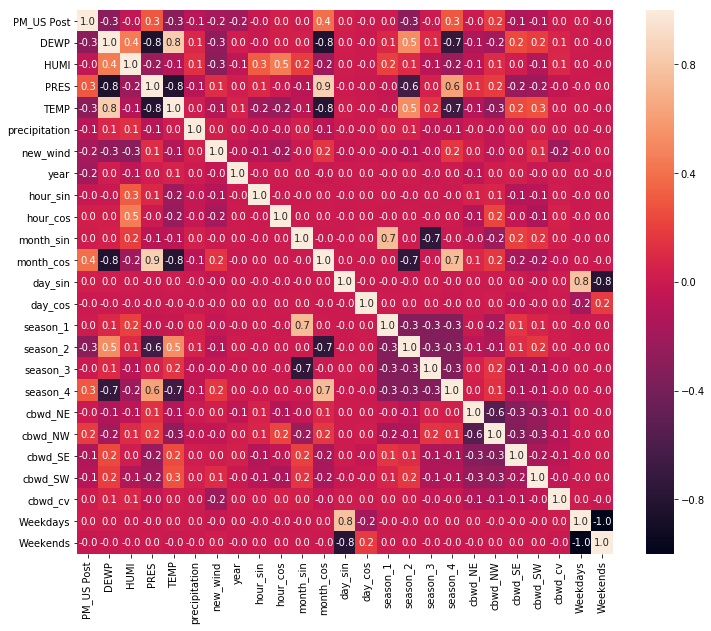

In [33]:
import seaborn as sns
corr = dataset_Guangzhou_clean.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

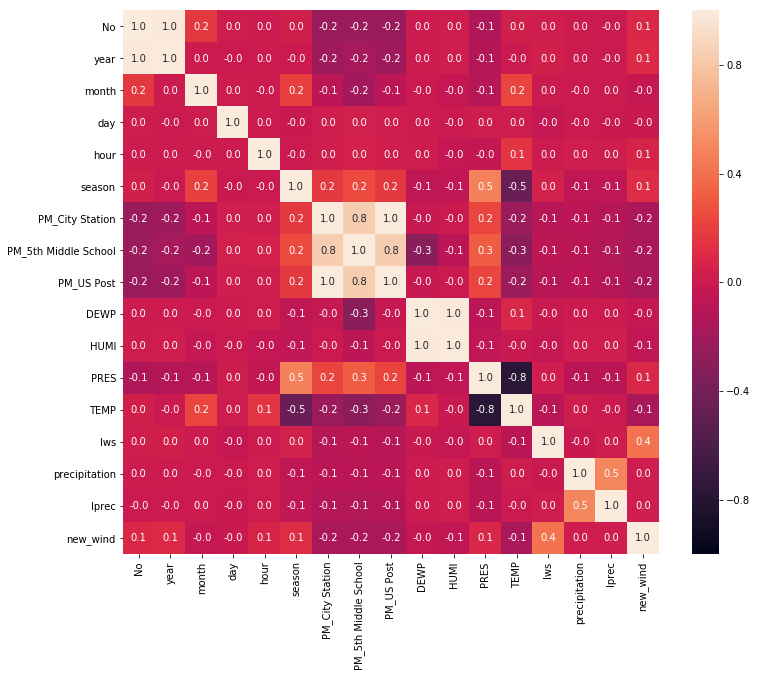

In [33]:
import seaborn as sns
corr = dataset_Guangzhou.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

# Implementation

In [63]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
from sklearn.cross_validation import train_test_split


In [64]:
# Load Guangzhou dataset
Guangzhou = pd.read_csv('dataset_Guangzhou_clean.csv')
Guangzhou = Guangzhou.drop('Unnamed: 0', axis = 1)

# Success - Display the first five records
display(Guangzhou.head(n=3))

# Total number of records
n_records = len(Guangzhou["PM_US Post"])
print("Number of records for Guangzhou: ", n_records)
print("*********************")

display(Guangzhou.info())


,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,1,83.0,3.7,91.0,1014.2,5.0,0.0,1.9,0.000000,...,1.0,0,0,0,1,0,1,0,0,0
1,2013,1,95.0,4.2,88.0,1014.2,6.0,0.0,1.5,0.258819,...,1.0,0,0,0,1,0,1,0,0,0
2,2013,1,94.0,4.3,84.0,1014.0,6.8,0.0,1.6,0.500000,...,1.0,0,0,0,1,0,1,0,0,0


Number of records for Guangzhou:  24955
*********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955 entries, 0 to 24954
Data columns (total 22 columns):
year             24955 non-null int64
day              24955 non-null int64
PM_US Post       24955 non-null float64
DEWP             24955 non-null float64
HUMI             24955 non-null float64
PRES             24955 non-null float64
TEMP             24955 non-null float64
precipitation    24955 non-null float64
new_wind         24955 non-null float64
hour_sin         24955 non-null float64
hour_cos         24955 non-null float64
month_sin        24955 non-null float64
month_cos        24955 non-null float64
season_1         24955 non-null int64
season_2         24955 non-null int64
season_3         24955 non-null int64
season_4         24955 non-null int64
cbwd_NE          24955 non-null int64
cbwd_NW          24955 non-null int64
cbwd_SE          24955 non-null int64
cbwd_SW          24955 non-null int64
cbwd_cv  

None

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


def applyCV(name,estimator):
    # Construct the pipeline with a standard scaler and a small neural network
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append((name, estimator))
    model = Pipeline(estimators)

    # Split the data into features and target label

    features = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'year']
    #features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
    X = Guangzhou[features].values
    y = Guangzhou['PM_US Post']

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold"
    # are mutually orthogonal.
    kfold = KFold(n_splits=5,  shuffle=True)

    print(estimators)

    print("**cross_val_score + KFold **")

    results_R2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print('CV Scoring Result: r2 : mean=',np.mean(results_R2),'std=',np.std(results_R2))
    #print(results_R2) 
    print("**************")
    
    results_MAE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print('CV Scoring Result: MAE : mean=',np.mean(results_MAE),'std=',np.std(results_MAE))
    #print(results_MAE)  
    print("**************")

    results_MSE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print('CV Scoring Result: MSE : mean=',np.mean(results_MSE),'std=',np.std(results_MSE))
    #print(results_MSE) 
    
    print("***********************************")

    print("**cross_validate**")
    
    scores = cross_validate(model, X, y, scoring=('r2'), cv = 5)
    print('CV Scoring Result: r2 : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_absolute_error'), cv = 5)
    print('CV Scoring Result: MAE : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_squared_error'), cv = 5)
    print('CV Scoring Result: MSE : mean=',np.mean(scores['test_score']))
    #print(scores) 
    print("-----------------------------------------------")

    
applyCV("LR",LinearRegression())
print("*******************************************")
applyCV("RF",RandomForestRegressor(n_estimators = 96))
print("*******************************************")
applyCV("ANN",MLPRegressor(hidden_layer_sizes= (128, 256)))
print("*******************************************")
applyCV("SVR",SVR(kernel='rbf'))


[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.32057188870064685 std= 0.006451621917880228
**************
CV Scoring Result: MAE : mean= -15.939340924513283 std= 0.1650950638661801
**************
CV Scoring Result: MSE : mean= -402.25208165333004 std= 11.241489860769766
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.16432851580850705
**************
CV Scoring Result: MAE : mean= -16.681085459141958
**************
CV Scoring Result: MSE : mean= -435.47942993903655
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_im

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Scoring Result: MAE : mean= -21.02513558355976
**************
CV Scoring Result: MSE : mean= -777.4396318737462
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.3881913795021549 std= 0.01619882813746446
**************
CV Scoring Result: MAE : mean= -14.507624947299345 std= 0.14757447040687097
**************
CV Scoring Result: MSE : mean= -362.3069311394455 std= 7.733995076031733
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.1502713964347675
**************
CV Scoring Result: MAE : mean= -16.179811263484197
**************
CV Scoring Result: MSE : mean= -437.89608638320385
-------------------------------------------

In [60]:
#Unneeded_Columns = ['precipitation', 'Iprec']
#dataset_Beijing_clean = dataset_Beijing_clean.drop(Unneeded_Columns, axis = 1)
display(Guangzhou.head(n=1))


,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1.0,season_2.0,season_3.0,season_4.0,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
26304,2013,1,83.0,3.7,91.0,1014.2,5.0,0.0,1.9,0.0,...,1.0,0,0,0,1,0,1,0,0,0


In [66]:

features_ = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
#features_ = ['HUMI', 'PRES', 'TEMP', 'new_wind', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Features = Guangzhou[features_].values
Target = Guangzhou['PM_US Post']


# Saving feature names for later use
feature_list = list(Guangzhou[features_])

display(Guangzhou[features_].head(n=2))
display(Target.head(n=2))

,DEWP,HUMI,PRES,TEMP,new_wind,precipitation,hour_sin,hour_cos,month_sin,month_cos,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,season_1,season_2,season_3,season_4,year
0,3.7,91.0,1014.2,5.0,1.9,0.0,0.000000,1.000000,0.0,1.0,0,1,0,0,0,0,0,0,1,2013
1,4.2,88.0,1014.2,6.0,1.5,0.0,0.258819,0.965926,0.0,1.0,0,1,0,0,0,0,0,0,1,2013


0    83.0
1    95.0
Name: PM_US Post, dtype: float64

In [67]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.33, random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression

Linear_regression = LinearRegression()
start_Training_time = int(time() * 1000)
Linear_regression.fit(X_train, y_train)
end_Training_time = int(time() * 1000)

print( "Linear Regression: " )
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


predict = Linear_regression.predict(X_test)

r2 = r2_score(y_test, predict)
MSE =  mean_squared_error(y_test,predict)

print('Testing: ')
print ('Testing r2_score: ', round(r2, 5))
print('Testing MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predict)
print('MAE_score: ', round(MAE, 5))

# Calculate the absolute errors
errors = abs(predict - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Linear Regression: 
Training: 
Training took 25 ms
Testing: 
Testing r2_score:  0.28127
Testing MSE_score:  844.18967
MAE_score:  20.48195
Mean Absolute Error: 20.48 degrees.
Accuracy: 23.6 %.


In [70]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 96)

start_Training_time = int(time() * 1000)
rf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Random Forest Regressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


start_Testing_time = int(time() * 1000)
predictions = rf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', round(MAE, 5))


# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest Regressor: 
Training: 
Training took 9380 ms
Testing: 
Testing took 306 ms
r2_score:  0.64301
MSE_score:  419.29881
MAE_score:  13.62212
Mean Absolute Error: 13.62 degrees.
Accuracy: 52.34 %.


In [71]:
rf1 = RandomForestRegressor(n_estimators = 96)

# Feature Scaling
#Sc_X1 = StandardScaler()
#CorrelatedFeaturesScaled = Sc_X1.fit_transform(Features)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf1, Features, Target, scoring=('r2'), cv = 5)
print(scores)  

{'fit_time': array([10.93325806,  9.84091806,  8.61690187,  8.84680104,  9.522856  ]), 'score_time': array([0.05906391, 0.06874084, 0.07515001, 0.05675602, 0.10291886]), 'test_score': array([ 0.12259454, -0.00444412, -0.13772647, -0.06826887, -0.71892759]), 'train_score': array([0.95478546, 0.9546218 , 0.96044267, 0.95567168, 0.9521627 ])}


In [72]:
# Saving feature names for later use
#feature_list = list(Features.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: month_cos            Importance: 0.19
Variable: DEWP                 Importance: 0.12
Variable: PRES                 Importance: 0.12
Variable: new_wind             Importance: 0.12
Variable: TEMP                 Importance: 0.09
Variable: HUMI                 Importance: 0.08
Variable: year                 Importance: 0.08
Variable: hour_sin             Importance: 0.04
Variable: hour_cos             Importance: 0.04
Variable: month_sin            Importance: 0.04
Variable: precipitation        Importance: 0.02
Variable: cbwd_NE              Importance: 0.01
Variable: cbwd_NW              Importance: 0.01
Variable: cbwd_SE              Importance: 0.01
Variable: season_2             Importance: 0.01
Variable: cbwd_SW              Importance: 0.0
Variable: cbwd_cv              Importance: 0.0
Variable: season_1             Importance: 0.0
Variable: season_3             Importance: 0.0
Variable: season_4             Importance: 0.0


In [73]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes= (128, 256))
start_Training_time = int(time() * 1000)
mlp.fit(X_train,y_train)
end_Training_time = int(time() * 1000)

print('Neural Network / MLPRegressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

predictions = mlp.predict(X_test)

print('Testing: ')
r2 = r2_score(y_test,predictions)
print('r2_score: ', r2)
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', MSE)
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Neural Network / MLPRegressor: 
Training: 
Training took 25686 ms
Testing: 
r2_score:  0.5417562940351996
MSE_score:  538.2316991096174
MAE_score:  16.178295287253153
Mean Absolute Error: 16.18 degrees.
Accuracy: 45.58 %.


In [74]:
from sklearn.svm import SVR

clf = SVR(kernel='rbf')
start_Training_time = int(time() * 1000)
clf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Support Vector Regression: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

start_Testing_time = int(time() * 1000)
predictions = clf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Support Vector Regression: 
Training: 
Training took 15600 ms
Testing: 
Testing took 4723 ms
r2_score:  0.30648
MSE_score:  814.57254
MAE_score:  18.58586363623342
Mean Absolute Error: 18.59 degrees.
Accuracy: 41.97 %.
